## Homework 3
From Chapter 4, found on pages 196-197 of ISLP

*This question should be answered using the `Weekly` data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this section's in-class exercises, except that it contains 1089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.*

In [16]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore') # mute warning messages

# Import specific objects
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import load_data
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
Weekly = load_data('Weekly')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

In [5]:
Weekly.describe().iloc[:,1:]

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [6]:
Weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


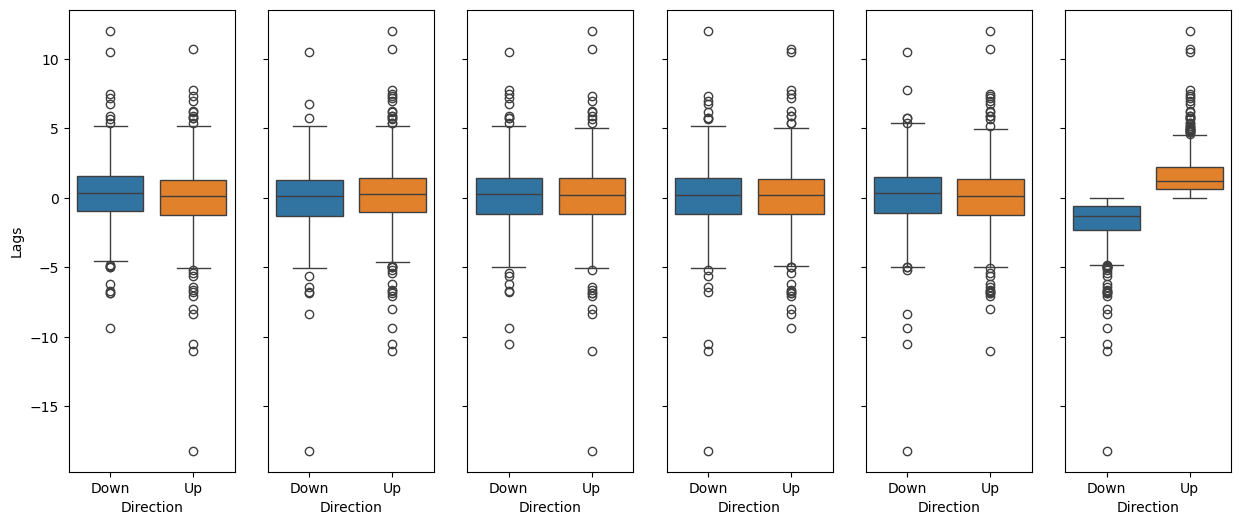

In [8]:
# Lets have a look at the relationship between weekly lagged percentage returns with todays direction

a_cols = [col for col in Weekly.columns.tolist() if col not in ['Direction', 'Year', 'Volume']]

fig, axes = plt.subplots(nrows = 1, ncols = len(a_cols), figsize = (15,6), sharey=True)

for ci, column in enumerate(a_cols):
    
    sns.boxplot(x = 'Direction', y = f"{column}", data = Weekly, ax=axes[ci], hue = 'Direction')

    #axes[ci].set_title(column)
    axes[ci].set_ylabel('Lags') #lazy solution to reset the y axis label which returns 'Lag1' unless this syntax is added

    
plt.show()

Not any Weekly Lags has strong relationship with todays market direction, apart from the obvious relationship with todays percentage returns, e.g when it is positive direction is up and vice versa.

<Axes: xlabel='Direction', ylabel='Volume'>

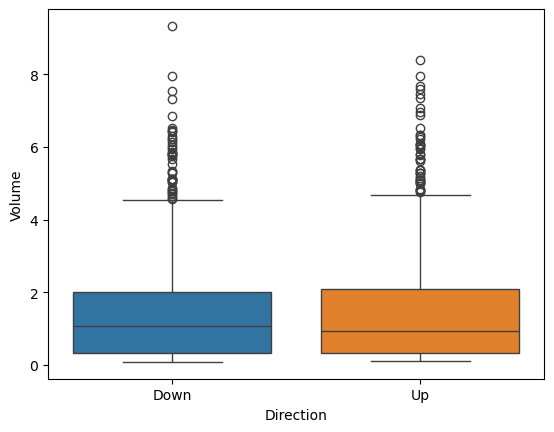

In [9]:
sns.boxplot(x = 'Direction', y = 'Volume', data = Weekly, hue = 'Direction')

Volume also does not appear to have any particular relationship between todays market direction

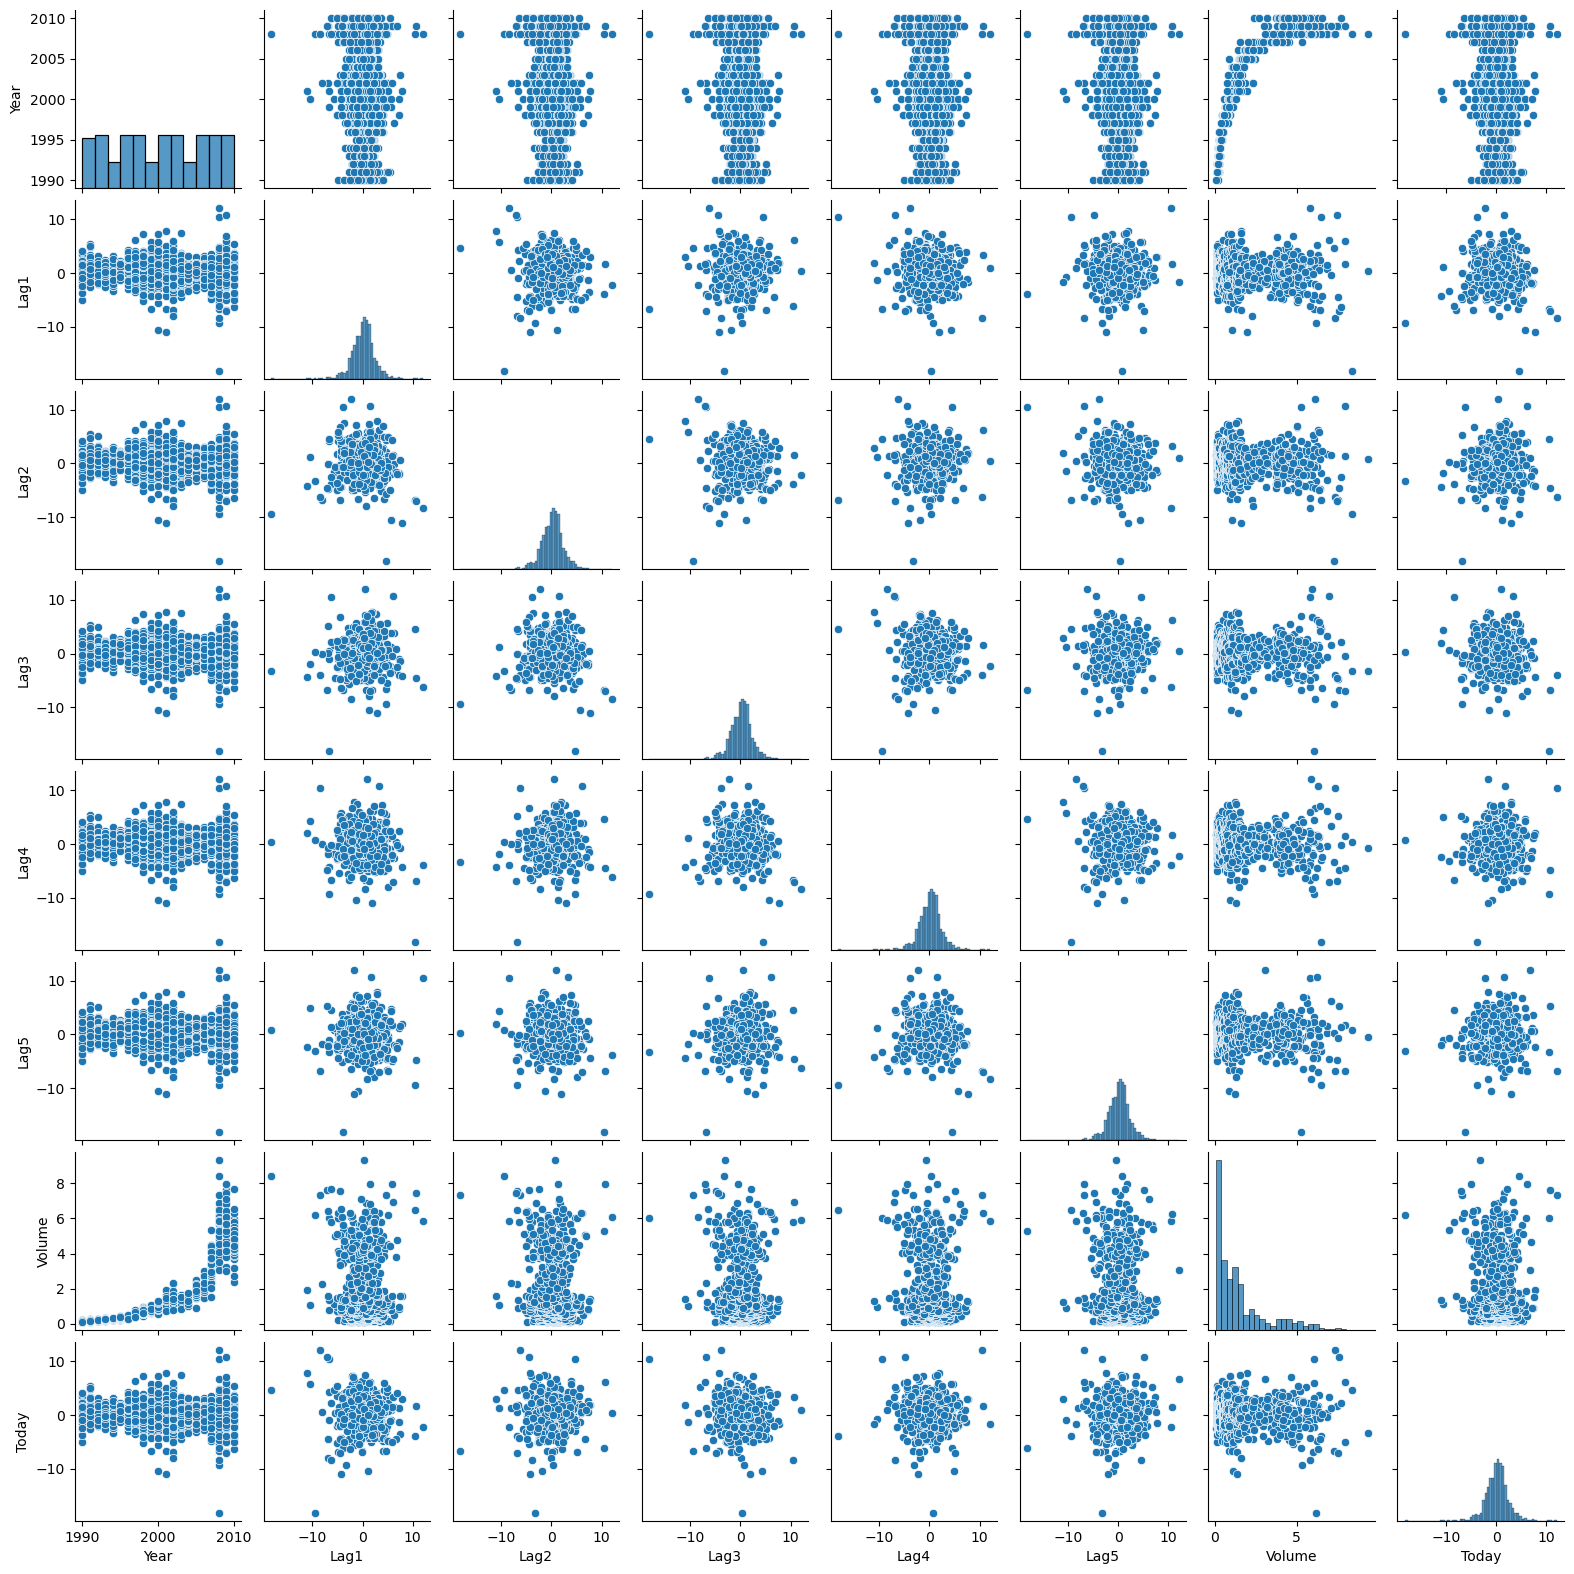

In [10]:
sns.pairplot(Weekly, height=2.)

plt.show()

Some of the findings above can be confirmed from the above pairplot as well. Lagged percentage returns also do not seem to have any relationship with each other, nor with the todays percentage return. The only strong relationship is between year and volume as it latter exponentially rise towards 2010.

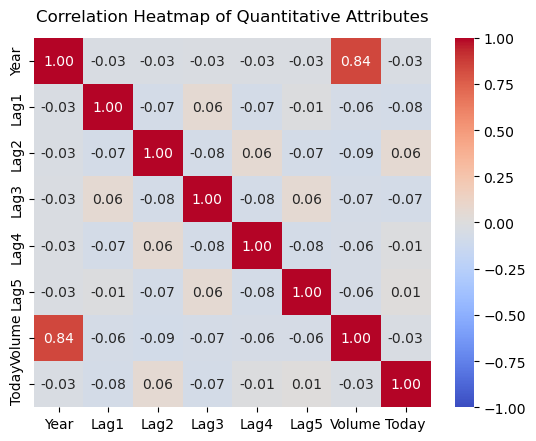

In [11]:
quant_cols = [col for col in Weekly.columns.tolist() if col not in ['Direction']]

Wmarket_CorrM = Weekly[quant_cols].corr()

heatmp = sns.heatmap(Wmarket_CorrM, vmin=-1, vmax=1, annot = True, fmt=".2f", annot_kws={"size": 10}, cmap = 'coolwarm') # .corr() automatically ignores the qualitative 'Direction'

heatmp.set_title('Correlation Heatmap of Quantitative Attributes', fontdict={'fontsize':12}, pad=12);

<Axes: >

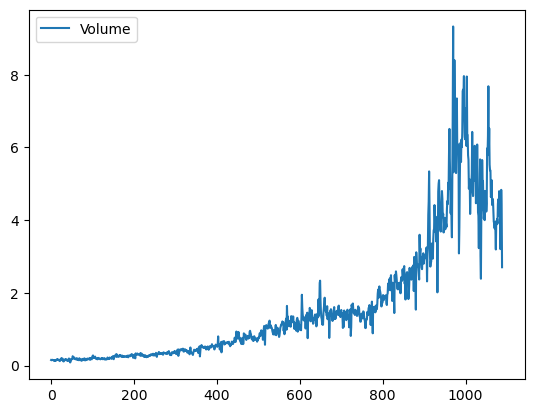

In [12]:
Weekly.plot(y = 'Volume')

<Axes: >

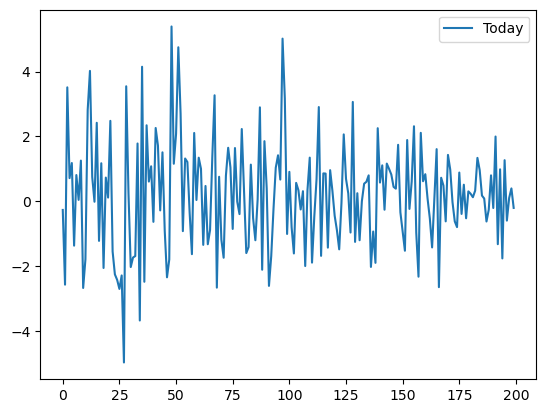

In [13]:
Weekly[:200].plot(y = 'Today') # non-stationary time-series

b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Do not forget to drop missing values due to lag creation. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [14]:
X_df = Weekly.drop('Direction', axis = 1) # all attributes df

fit_cols = X_df.columns.drop(['Today','Year'])

X = sm.add_constant(X_df[fit_cols]) # add an intercept
y = Weekly.Direction == 'Up' # returns Up and Down to True and False that can be processed by the Logistic reg below

logreg = sm.GLM(y,X,family=sm.families.Binomial())

results_logreg = logreg.fit()

print(results_logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Sat, 08 Jun 2024   Deviance:                       1486.4
Time:                        15:17:50   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.0

There appear to be only lag2 has statistically significant relationship for the response, its coefficient is positive indicating that if market is up two weeks ago, it will likely go up today, though the relationship is not so significant.

In [18]:
allvars = Weekly.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'
# fit the model
glm = sm.Logit(y, X)

# # or equally:
# glm = sm.GLM(y,
#              X,
#              family=sm.families.Binomial())
results = glm.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:                0.006580
Time:                        15:21:02   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression

In [19]:
probs = results.predict()
labels = np.array(['Down']*len(probs))
labels[probs>0.5] = "Up"
confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [21]:
print(f"Overall Accuracy and Error rate of the Log-reg on the training set are {np.mean(labels==Weekly.Direction):.2f}, {np.mean(labels!=Weekly.Direction):.2f}")

Overall Accuracy and Error rate of the Log-reg on the training set are 0.56, 0.44


Assuming positive labels as the 'Up' and negatives as 'Down', logistic regression 430 times incorrectly predicts 'Up' while the market is acually 'Down', that is False Positive (FP) predictions is FP = 430. On the other hand, log-reg predicts 48 times Down while the market is actually Up, i.e FN = 48. The model correctly identifies 54 times the market will go down, TN =54 while 554 it correctly predicts the market will go Up, TP = 557.

d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [22]:
train = (Weekly.Year < 2009)

X_df = X_df.drop(columns=[col for col in X_df.columns.tolist() if col not in ['Lag2']]) # Lag2 is chosen as the only predictor

X_train, y_train = X_df[train], y[train]

X_test, y_test = X_df[~(train)], y[~(train)]

X_train = sm.add_constant(X_train) # add an intercept
X_test = sm.add_constant(X_test) # add an intercept

logreg2 = sm.GLM(y_train,X_train,family=sm.families.Binomial())

results_logreg2 = logreg2.fit()

print(results_logreg2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Sat, 08 Jun 2024   Deviance:                       1350.5
Time:                        15:55:53   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.0

In [24]:
probs2 = results_logreg2.predict(X_test) #training predictions as probabilities

p_labels2 = np.array(['Down'] * X_test.shape[0])

p_labels2[probs2 > 0.5] = 'Up'

confusion_table(p_labels2, Weekly.Direction[~(train)])

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [27]:
print(f"Overall Test Accuracy and Error rate of the Log-reg onto Lag2 are {np.mean(p_labels2 == Weekly.Direction[~(train)]):.3f}, {np.mean(p_labels2 != Weekly.Direction[~(train)]):.3f}")

Overall Test Accuracy and Error rate of the Log-reg onto Lag2 are 0.625, 0.375


e) Use KNN with K = 1.

In [28]:
train = (Weekly.Year < 2009)

X_df = X_df.drop(columns=[col for col in X_df.columns.tolist() if col not in ['Lag2']]) # Lag2 is chosen as the only predictor

X_train, X_test = X_df[train], X_df[~(train)]

D = Weekly.Direction

Y_train, Y_test = D.loc[(train)], D.loc[~(train)]

knn1 = KNeighborsClassifier(n_neighbors=1) 

X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]

knn1.fit(X_train, Y_train)

knn1_pred = knn1.predict(X_test)

confusion_table(knn1_pred, Y_test)

Truth,Down,Up
Predicted,,
Down,22,31
Up,21,30


In [29]:
print(f"Overall Test Accuracy and Error rate of the Log-reg onto Lag2 are {np.mean(knn1_pred == Weekly.Direction[~(train)]):.3f}, {np.mean(knn1_pred != Weekly.Direction[~(train)]):.3f}")

Overall Test Accuracy and Error rate of the Log-reg onto Lag2 are 0.500, 0.500


In [32]:
CM = confusion_matrix(knn1_pred, Weekly.Direction[~(train)])

In [33]:
print(f"Accuracy of log-reg on days it predicts an Upward trend: {(CM[1,1]/CM[1].sum())*100:.2f}%") # TP / (FP + TP)
print("\n")
print(f"Accuracy of log-reg on days it predicts a Downward trend: {(CM[0,0]/CM[0].sum())*100:.2f}%") # TP / (FP + TP)

Accuracy of log-reg on days it predicts an Upward trend: 58.82%


Accuracy of log-reg on days it predicts a Downward trend: 41.51%


Additional Practice Questions: 
- Explain the difference between MLR and OLS to a non-technical audience. 
- How would you describe this exercise in an interview to both a technical and non-technical interviewer?
- What are the key insights you would want to show? 
- Can you think of a business context where this exercise would have applications?